In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("height.csv")
df.head()

,Height,Weight
0,160,48
1,150,50
2,155,55
3,159,60
4,170,65


In [3]:
df.shape

(21, 2)

In [4]:
df.info

<bound method DataFrame.info of     Height  Weight
0      160      48
1      150      50
2      155      55
3      159      60
4      170      65
5      100      32
6      140      40
7      250      80
8      161      54
9      190      60
10     186      59
11     132      45
12     115      30
13      90      28
14     100      30
15     160      42
16     150      45
17     170      75
18     160      62
19     170      67
20     156      52>

In [5]:
df.describe()

,Height,Weight
count,21.000000,21.000000
mean,153.523810,51.380952
std,35.105013,14.654270
min,90.000000,28.000000
25%,140.000000,42.000000
50%,159.000000,52.000000
75%,170.000000,60.000000
max,250.000000,80.000000


In [6]:
df.dtypes

Height    int64
Weight    int64
dtype: object

In [7]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

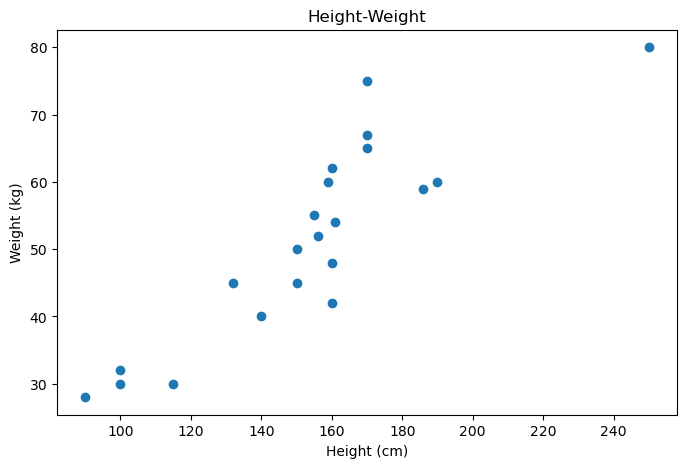

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(df['Height'],df['Weight'])
plt.title("Height-Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


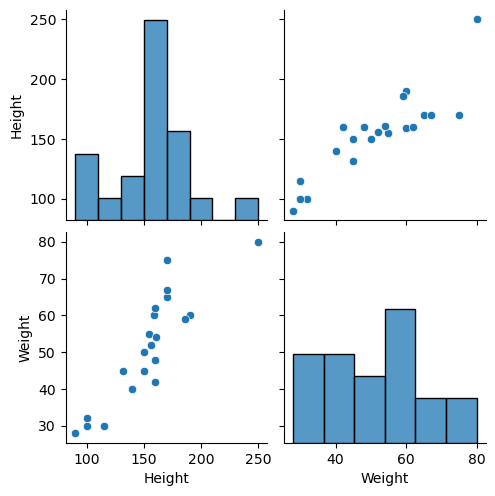

In [15]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()

,Height,Weight
Height,1.000000,0.880845
Weight,0.880845,1.000000


In [16]:
#independent feature 
x=df['Height']
type(x)

pandas.core.series.Series

In [17]:
#series to data frame
x = pd.DataFrame(df['Height'])
type(x)

pandas.core.frame.DataFrame

In [18]:
np.array(x).shape

(21, 1)

In [19]:
#dependent feature
y=df['Weight']
type(y)

pandas.core.series.Series

In [20]:
#train-test-split
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [24]:
x_train.shape

(15, 1)

In [25]:
x_test.shape

(6, 1)

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit_transform(x_train)

array([[-0.6063668 ],
       [ 0.10960566],
       [ 0.13612316],
       [-0.12905183],
       [-1.72010175],
       [ 0.00353567],
       [ 0.93164812],
       [ 0.03005317],
       [ 0.40129815],
       [-1.05716428],
       [ 2.52269804],
       [ 0.82557813],
       [-1.45492676],
       [ 0.40129815],
       [-0.39422681]])

In [32]:
scaler.transform(x_test)

array([[ 0.4244165],
       [ 0.8560265],
       [ 0.4244165],
       [-0.0071935],
       [ 0.4675775],
       [-2.1652435]])

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression(n_jobs=-1)

In [36]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [40]:
print("slope ",regression.coef_)
print("intercept ",regression.intercept_)

slope  [0.36024889]
intercept  -3.9238786658999487


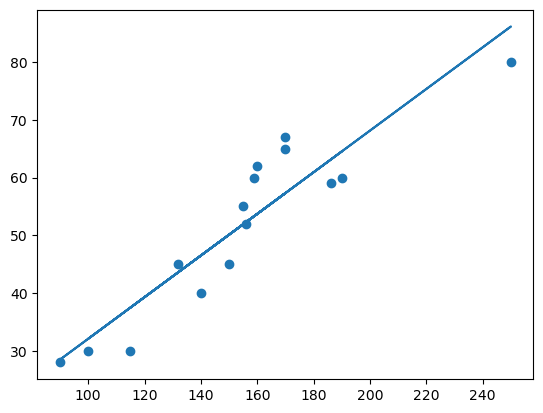

In [43]:
scatter = plt.scatter(x_train,y_train)
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))
plt.show(scatter)